#1. Maximum MEC of Neural Networks

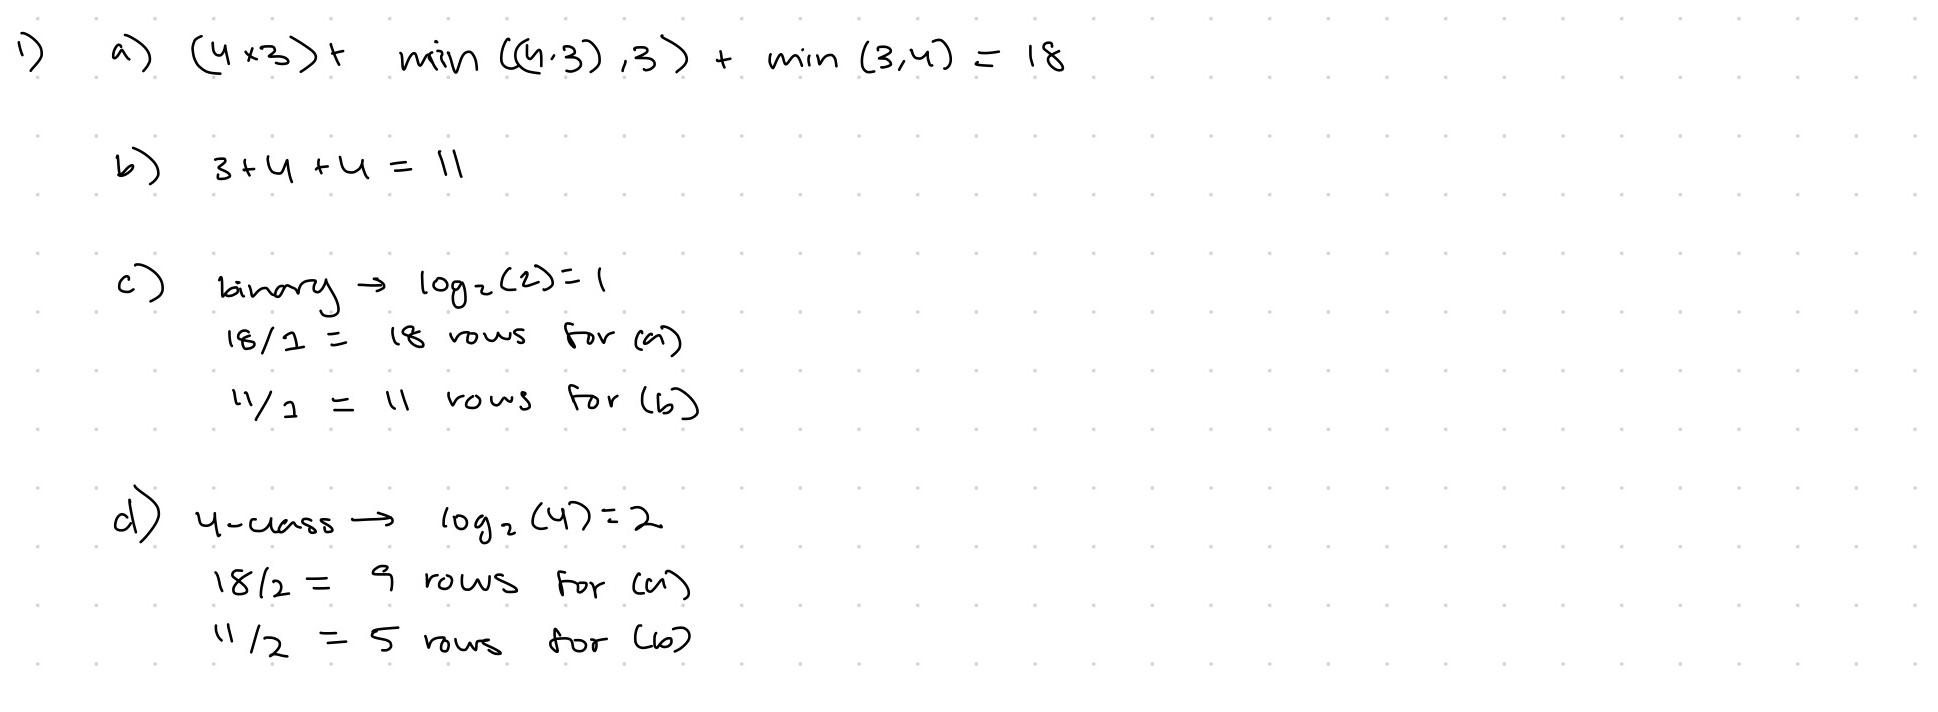

# 2.

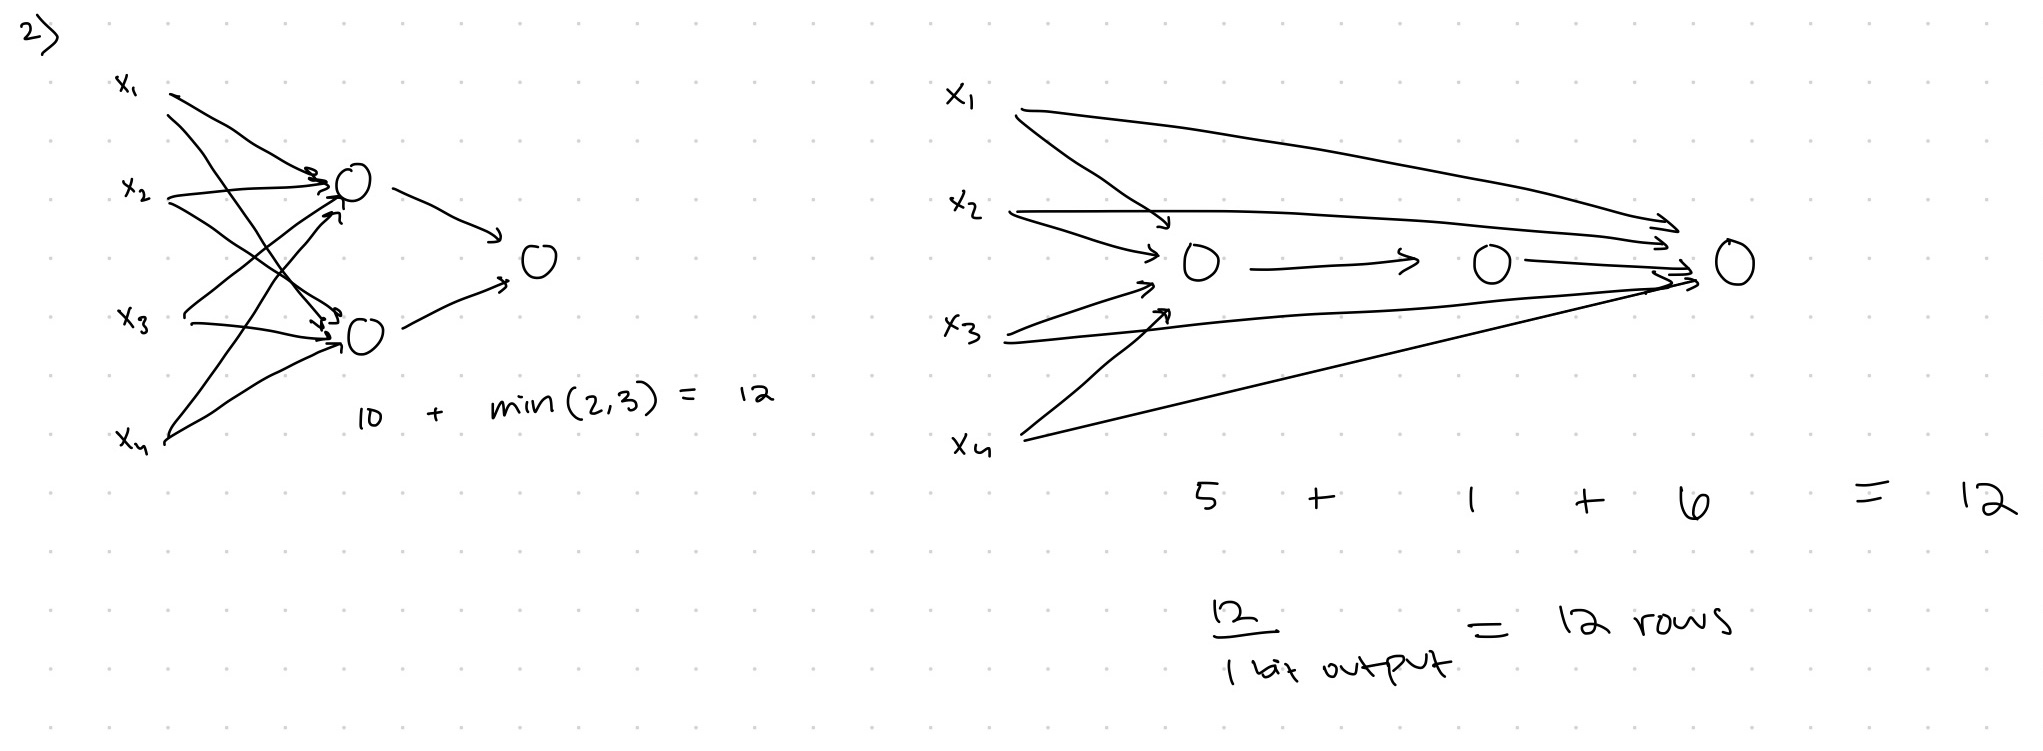

# 4. Upper Bounds

## a)

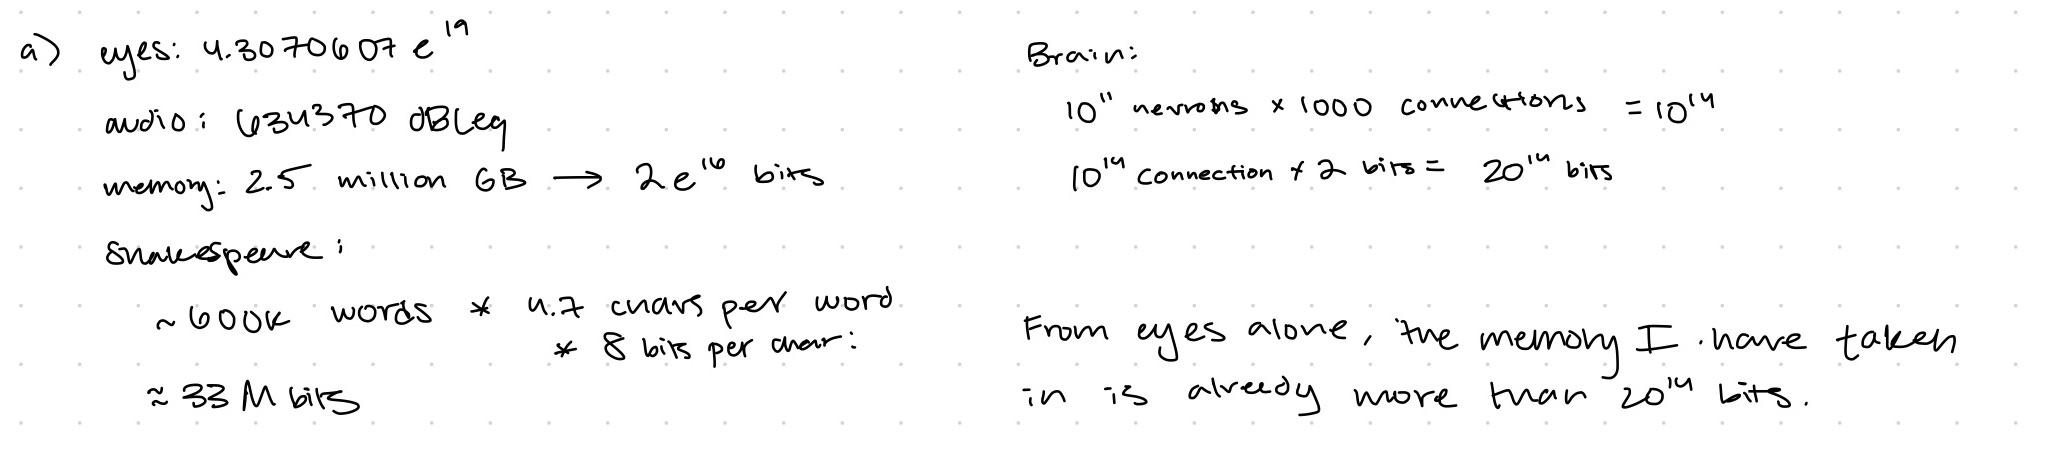

**References**

Memory:
https://www.medanta.org/patient-education-blog/what-is-the-memory-capacity-of-a-human-brain#:~:text=A%20%E2%80%9Cpetabyte%E2%80%9D%20means%201024%20terabytes,the%20most%20authoritative%20modern%20computers.

Shakespeare:
https://www.folger.edu/explore/shakespeares-works/frequently-asked-questions/#:~:text=How%20many%20words%20did%20Shakespeare,884%2C647%20words%20and%20118%2C406%20lines.

Eyes:
https://caseguard.com/articles/how-many-frames-per-second-can-the-human-eye-see/

Audio:
https://www.head-fi.org/threads/what-is-the-highest-amount-of-sound-quality-that-the-human-ear-can-actually-pick-up.841322/

## b)

In order to implement Algorithm 8 on multiple binary classifications, I operated under the assumption that the labels parameter is a 2D array which contains labels for each classification within one row. I also added a class_num parameter which is the number of binary classifications being applied (though this is equivalent to labels.shape[0]). In order to apply the algorithm for multiple classes, I loop over the range of class_num and ensure that the label being applied to the table in the loop is corresponding to the current class by indexing into that class. I have a list 'all_thresholds' which stores the individual threshold counts for each classification. I then sum these after all classifications have been claculated, and take the log of this and calculate the MEC as was done in the original algorithm.

In [ ]:
import numpy as np

def memorize(data, labels, class_num):
    n, d = data.shape
    all_thresholds = []

    for c in range(class_num):
      thresholds = 0
      table = []

      for row in range(n):
          table.append([np.sum(data[row]), labels[row, c]])

      sorted_table = sorted(table, key=lambda x: x[0])
      class_label = 0

      for row in range(n):
          if sorted_table[row][1] != class_label:
              class_label = sorted_table[row][1]
              thresholds += 1
      all_thresholds.append(thresholds)

    total_thresh = sum(all_thresholds)
    min_threshs = int(np.log2(total_thresh + 1))
    mec = (min_threshs * (d + 1)) + (min_threshs + 1)

    return mec

# Example usage:
data = np.array([[0, 1], [1, 1], [1, 0], [0, 0]])  # Example 2D vectors
labels = np.array([[0, 1], [0, 1], [0, 1], [0, 1]])  # Corresponding binary labels
mec = memorize(data, labels, 2)
print("MEC:", mec)

MEC: 5


## c)

I incorported the concept of epsilon, which has been discussed in the book in regards to regression, by using the epsilon constant to create epsilon-sized categories in the span of the data's range. These then become makeshift labels for the regression to tally makeshift thresholds.

In [ ]:
import numpy as np

def memorize(data, epsilon):
    n, d = data.shape

    # divide into size epsilon sections
    data_range = np.max(data, axis=0) - np.min(data, axis=0)
    num_sections = int(np.ceil(data_range / epsilon))

    # thresholds for each dimension
    thresholds = np.linspace(0, 1, num_sections)

    section_labels = np.zeros((n,))
    for i in range(d):
        section_labels += np.digitize(data[:, i], thresholds) * (num_sections ** i)

    num_unique_labels = len(np.unique(section_labels))

    min_threshs = int(np.log2(num_unique_labels + 1))
    mec = (min_threshs * (d + 1)) + (min_threshs + 1)

    return mec